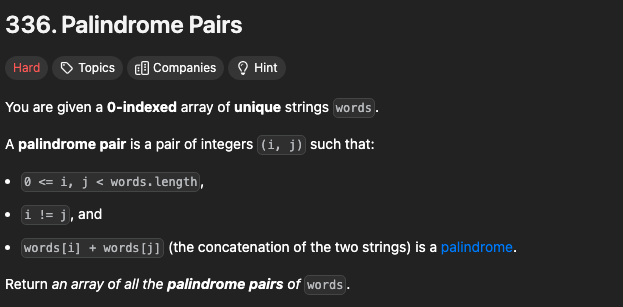   
https://leetcode.com/problems/palindrome-pairs/description/

You are given a 0-indexed array of unique strings words.

  
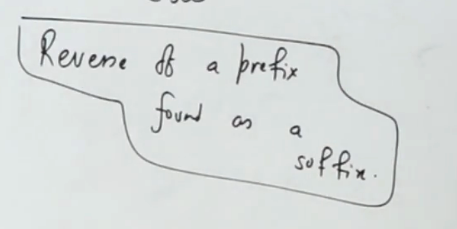

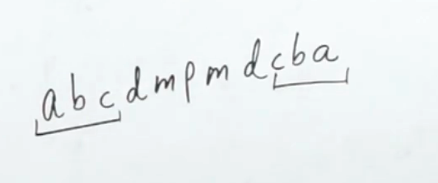

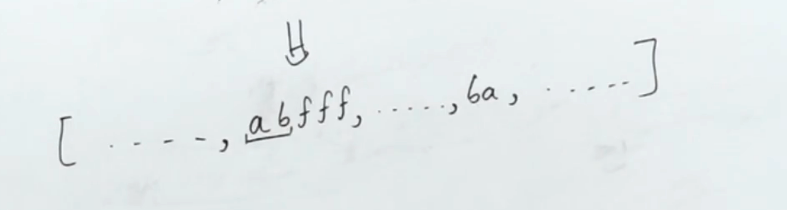   
If reverse of a prefix is preset as a word, you will get excited

# suffixes and doubt part

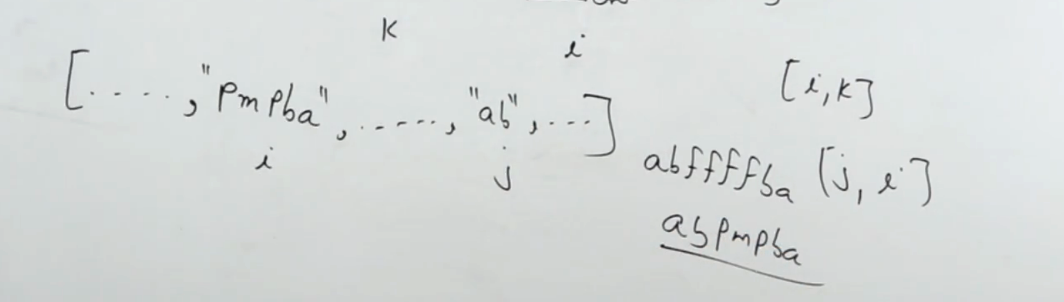

# Edge cases

1. A palindrome is there, when you take the whole word as the prefix, its suffix will be the same word which is already present in m

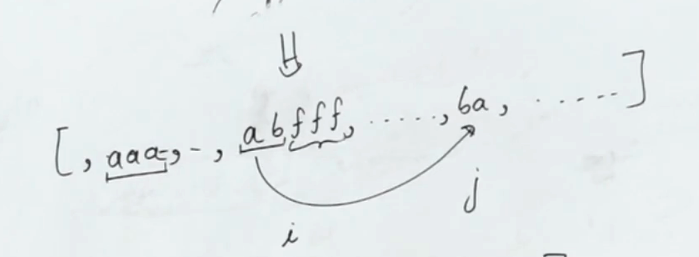

store indices also

# duplication

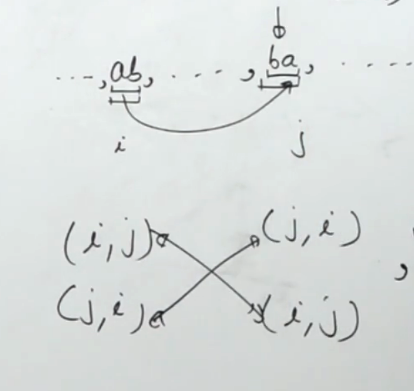    
When words are opposite of each other

# Coding

In [ ]:
class Solution {
    private:
    bool isPal(string &s,int i,int j){
            while(i<j){
                if(s[i]!=s[j]) return false;
                i++;
                j--;
            }
            return true;
    }

    public:
        vector<vector<int>> palindromePairs(vector<string>& words) {
            unordered_map<string, int> revWordsAndIndices;
            int N=words.size();
            for(int i=0;i<N;i++){
                revWordsAndIndices[string(words[i].rbegin(),words[i].rend())]=i;
            } 
            set<vector<int>> ansSet;
            
            for(int i=0;i<N;i++){
                if(revWordsAndIndices.count("") and revWordsAndIndices[""]!=i and isPal(words[i],0,words[i].size()-1) and 
                    !ansSet.count({i,revWordsAndIndices[""]})){
                    ansSet.insert({i,revWordsAndIndices[""]});
                    ansSet.insert({revWordsAndIndices[""],i});                    
                }

            string prefix;
            for(int j=0;j<words[i].size();j++){
                prefix=words[i].substr(0,j+1);
                if(revWordsAndIndices.count(prefix) and revWordsAndIndices[prefix]!=i and isPal(words[i],j+1,words[i].size()-1) and 
                !ansSet.count({i,revWordsAndIndices[prefix]})){
                    ansSet.insert({i,revWordsAndIndices[prefix]});
                    //ye jab tum prefix wagera consider kar rahe hon to wah ith element ke kar rahe hon
                }   
            }


            string suffix;
            for(int j=words[i].size()-1;j>=0;j--){
                suffix=words[i].substr(j,words[i].size()-j);
                if(revWordsAndIndices.count(suffix) and revWordsAndIndices[suffix]!=i and isPal(words[i],0,j-1) and 
                !ansSet.count({revWordsAndIndices[suffix],i})){
                    ansSet.insert({revWordsAndIndices[suffix],i});
                }   
            }
        }

            vector<vector<int>> ans(ansSet.begin(),ansSet.end());
            return ans;
        }
    };